In [28]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

In [31]:
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y=[1,3,6,25,73,222,294,258,237,191,125,69,27,11,4]
a=y
l=[]
u=[]
z=[]
h=[]
A=[]
c=[]
b=[]
d=[]
for i in range(0,len(x)-1):
 l.append(0)
 u.append(0)
 z.append(0)
 h.append(0)
 A.append(0)
 c.append(0)
 b.append(0)
 d.append(0)

In [32]:
#Dterminando valores de h
i=1
for i in range(0,len(x)-1):
  h[i]= x[i+1]-x[i]

#Modificando valores de a
for i in range(1,len(x)-1):
  A[i]= (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])

In [33]:
#Paso 3 Iniciando l,u,z
l[0]=1
u[0]=0
z[0]=0

#Paso 4 Determinando l,u,z

for i in range(1,len(x)-1):
  l[i]=2*( x[i+1]-x[i-1]) - (h[i-1] )*(u[i-1])
  u[i]=(h[i] )/l[i]
  z[i]=(A[i]- (h[i-1])*(z[i-1]) )/l[i]

In [34]:
#Paso 5
l.append(1)
z.append(0)
c.append(0)

j= len(x)-2

while (j>=0) :
  c[j]=z[j] - (u[j])*(c[j+1])
  b[j]=(a[j+1] - a[j])/h[j] - (h[j])*(c[j+1] + 2*c[j])/3
  d[j]=(c[j+1] - c[j])/(3*h[j])
  j=j-1
a.pop()
c.pop()
print( "Coeficientes de las funciones que interpolan la función f(x)")
print( )
df = pd.DataFrame()
df["a_j"]=a
df["b_j"]=b
df["c_j"]=c
df["d_j"]=d
print(df)

Coeficientes de las funciones que interpolan la función f(x)

    a_j         b_j        c_j        d_j
0     1    2.907922   0.000000  -0.907922
1     3    0.184156  -2.723766   5.539610
2     6   11.355454  13.895064  -6.250517
3    25   20.394029  -4.856488  32.462459
4    73  108.068430  92.530889 -51.599320
5   222  138.332250 -62.267070  -4.065180
6   294    1.602570 -74.462611  36.860041
7   258  -36.742528  36.117513 -20.374985
8   237  -25.632456 -25.007441   4.639897
9   191  -61.727647 -11.087750   6.815397
10  125  -63.456957   9.358440  -1.901484
11   69  -50.444527   3.653989   4.790538
12   27  -28.764935  18.025603  -5.260668
13   11   -8.495733   2.243599  -0.747866


x 	 y
-----------
0 	 1
1 	 3
2 	 6
3 	 25
4 	 73
5 	 222
6 	 294
7 	 258
8 	 237
9 	 191
10 	 125
11 	 69
12 	 27
13 	 11
14 	 4


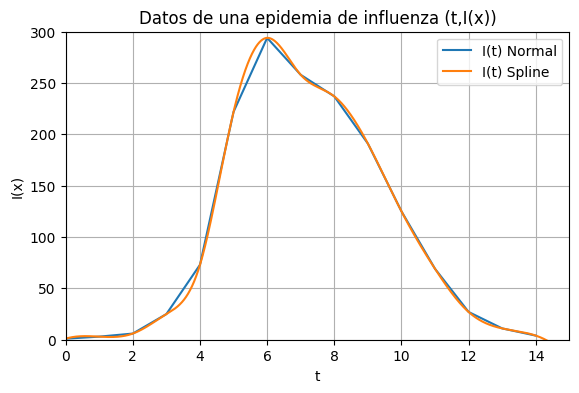

In [38]:
x =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y =np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])
print("x \t y")
print("-----------")
for i in range(0,15):
  print("{0} \t {1}".format(x[i],y[i]))
S= CubicSpline(x, y)
x_new = np.linspace(0, 15, 10000)
f_new = S(x_new)
plt.figure(figsize = (6.5,4))
plt.plot(x,y,label='I(t) Normal')
plt.plot(x_new, f_new, label='I(t) Spline')
plt.xlabel('t'); plt.ylabel('I(x)');
plt.title("Datos de una epidemia de influenza (t,I(x))")
plt.xlim([0,15]),plt.ylim([0,300]),plt.grid(),plt.legend()
plt.show()